In [74]:
import numpy as np
from numpy.fft import rfft,irfft
import astropy.units as u
import invert_chime_pfb as ic
import matplotlib.pyplot as plt

In [75]:
def power(a):
    return (a*np.conj(a)).real

In [98]:
data = np.load('sample_data.npy')

In [99]:
nt = data.shape[0]
nf = data.shape[1]

In [100]:
timestream = ic.get_real_timestream(data)

In [101]:
deconvolved = ic.deconvolve_timestream(timestream,nt)

In [102]:
channelize_t = rfft(timestream.reshape(-1,1024*8,2),axis=1)[:,1:,:]
channelize_d = rfft(deconvolved.reshape(-1,1024*8,2),axis=1)[:,1:,:]

In [103]:
f = 800*u.MHz - np.arange(4096)*400*u.MHz/4096

Text(0.5,1,'With PFB inversion')

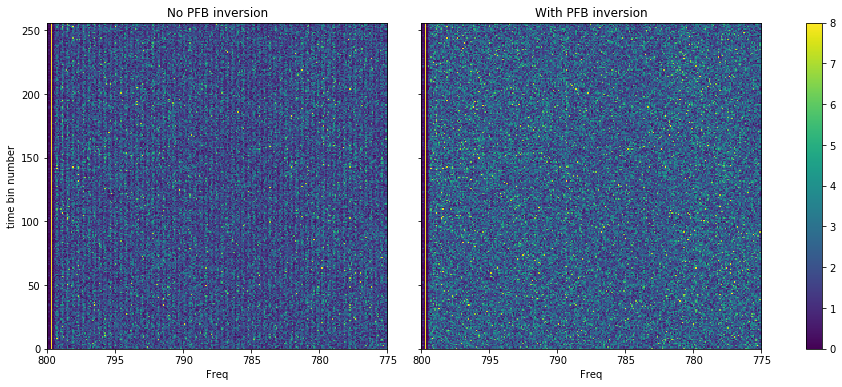

In [104]:
fig,ax = plt.subplots(1,2,figsize=(16,6),sharex=True,sharey=True)
Ip = power(channelize_t[...,0])
Ip = Ip.reshape(256,-1,Ip.shape[1]).mean(1)
cb=ax[0].imshow(Ip,aspect='auto',
             origin='lower',interpolation='none',vmin=0,vmax=8,
             extent=[f[0].value,f[-1].value,0,256])
Ip = power(channelize_d[...,0])
Ip = Ip.reshape(256,-1,Ip.shape[1]).mean(1)
ax[1].imshow(Ip,aspect='auto',
           origin='lower',interpolation='none',vmin=0,vmax=8,
           extent=[f[0].value,f[-1].value,0,256])
plt.subplots_adjust(wspace=0.1)
plt.colorbar(cb,ax=ax)
plt.xlim(f[0].value,f[256].value)

for a in ax:
    a.set_xlabel('Freq')
ax[0].set_ylabel('time bin number')
ax[0].set_title('No PFB inversion')
ax[1].set_title('With PFB inversion')

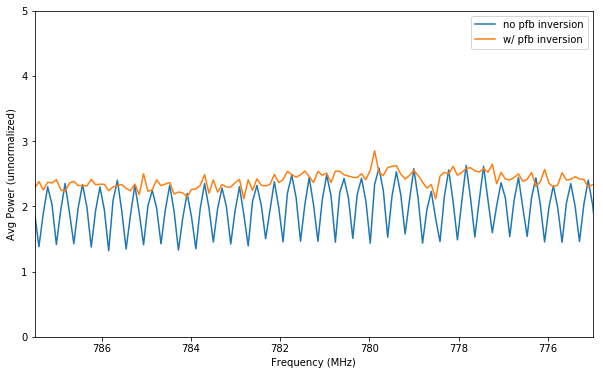

In [105]:
fig = plt.figure(figsize=(10,6))
plt.plot(f,power(channelize_t[...,0]).mean(0),label='no pfb inversion')
plt.plot(f,power(channelize_d[...,0]).mean(0),label='w/ pfb inversion')
plt.xlim(f[128].value,f[256].value)
plt.ylim(0,5)
plt.xlabel('Frequency (MHz)')
plt.ylabel('Avg Power (unnormalized)')
plt.legend()